#Parth Mahadik

# Pizza Price Prediction Using Machine Learning

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



Load Dataset

In [2]:
Pizza_df = pd.read_csv('/content/drive/MyDrive/ML project/Pizza /pizza_v1.csv')

Display  Top 5 Rows

In [3]:
Pizza_df.head(5)

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no


Display Last 5 Rows

In [4]:
Pizza_df.tail(5)

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
124,E,"Rp39,000",8.5,tuna,spicy tuna,small,yes,yes
125,E,"Rp72,000",12.0,tuna,spicy tuna,medium,yes,yes
126,E,"Rp99,000",14.0,tuna,spicy tuna,large,yes,yes
127,E,"Rp44,000",8.5,meat,BBQ_meat_fiesta,small,yes,no
128,E,"Rp78,000",12.0,meat,BBQ_meat_fiesta,medium,no,no


Shape of Dataset

In [5]:
print(f"Number of Rows {Pizza_df.shape[0]}")
print(f"Number of Columns {Pizza_df.shape[1]}")

Number of Rows 129
Number of Columns 8


INFO of Dataset - Number of  columns , Number  of Rows, Data Tytpes of Column , memory usage

In [6]:
print(Pizza_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    object 
 1   price_rupiah  129 non-null    object 
 2   diameter      129 non-null    float64
 3   topping       129 non-null    object 
 4   variant       129 non-null    object 
 5   size          129 non-null    object 
 6   extra_sauce   129 non-null    object 
 7   extra_cheese  129 non-null    object 
dtypes: float64(1), object(7)
memory usage: 8.2+ KB
None


Check Null Values In Dataset

In [7]:
Pizza_df.isnull().sum()

,0
company,0
price_rupiah,0
diameter,0
topping,0
variant,0
size,0
extra_sauce,0
extra_cheese,0


Data Preprocessing

In [8]:
Pizza_df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no


In [9]:
Pizza_df.rename(columns={'price_rupiah':'price'},inplace=True)

In [10]:
Pizza_df.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no


In [11]:
Pizza_df['price'] = Pizza_df['price'].astype(str).str.replace('Rp', '')
Pizza_df['price'] = Pizza_df['price'].str.replace(',', '').astype(int)


In [12]:
Pizza_df.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,235000,22.0,chicken,double_signature,jumbo,yes,yes
1,A,198000,20.0,papperoni,double_signature,jumbo,yes,yes
2,A,120000,16.0,mushrooms,double_signature,reguler,yes,yes
3,A,155000,14.0,smoked beef,double_signature,reguler,yes,no
4,A,248000,18.0,mozzarella,double_signature,jumbo,yes,no


In [13]:
def currancy(val):
  return val*0.0054



In [14]:
Pizza_df['price']=Pizza_df['price'].apply(currancy)

In [15]:
Pizza_df.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,1269.0,22.0,chicken,double_signature,jumbo,yes,yes
1,A,1069.2,20.0,papperoni,double_signature,jumbo,yes,yes
2,A,648.0,16.0,mushrooms,double_signature,reguler,yes,yes
3,A,837.0,14.0,smoked beef,double_signature,reguler,yes,no
4,A,1339.2,18.0,mozzarella,double_signature,jumbo,yes,no


In [16]:
Pizza_df['diameter'] = Pizza_df['diameter'].astype(str)
Pizza_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    object 
 1   price         129 non-null    float64
 2   diameter      129 non-null    object 
 3   topping       129 non-null    object 
 4   variant       129 non-null    object 
 5   size          129 non-null    object 
 6   extra_sauce   129 non-null    object 
 7   extra_cheese  129 non-null    object 
dtypes: float64(1), object(7)
memory usage: 8.2+ KB


#Data Analysis

####1) Univariate analysis

In [17]:
Pizza_df.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese'],
      dtype='object')

#####COMPANY

In [18]:
Pizza_df['company'].value_counts()

,count
company,
C,30
E,30
A,25
B,24
D,20


####price

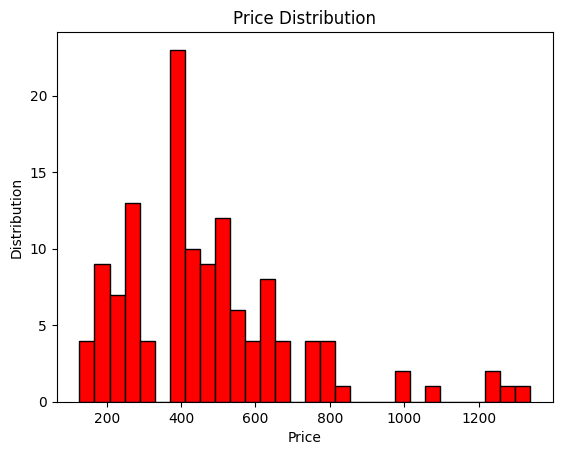

In [19]:
plt.hist(Pizza_df['price'],color="red",edgecolor='black',bins=30)
plt.xlabel('Price')
plt.ylabel('Distribution')
plt.title('Price Distribution')
plt.show()

####diameter

In [20]:
Pizza_df['diameter'].value_counts()

,count
diameter,
12.0,49
14.0,24
8.5,22
17.0,10
18.5,6
16.0,5
8.0,4
16.5,4
22.0,3


/tmp/ipython-input-3065918282.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='diametter')


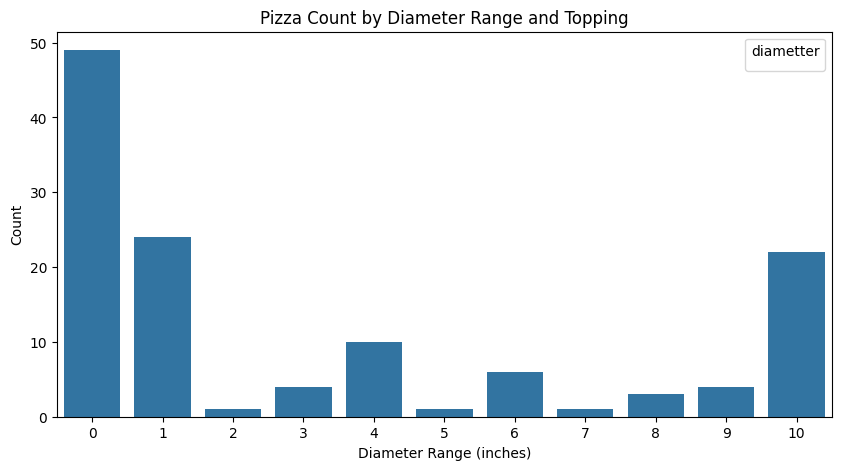

In [61]:
plt.figure(figsize=(10,5))
sns.countplot(x=Pizza_df['diameter'])
plt.xlabel('Diameter Range (inches)')
plt.ylabel('Count')
plt.title('Pizza Count by Diameter Range and Topping')
plt.legend(title='diametter')
plt.show()


topping

In [22]:
Pizza_df['topping'].value_counts()

,count
topping,
chicken,29
mushrooms,22
mozzarella,21
smoked beef,19
vegetables,9
tuna,9
meat,8
black papper,3
beef,3


topping

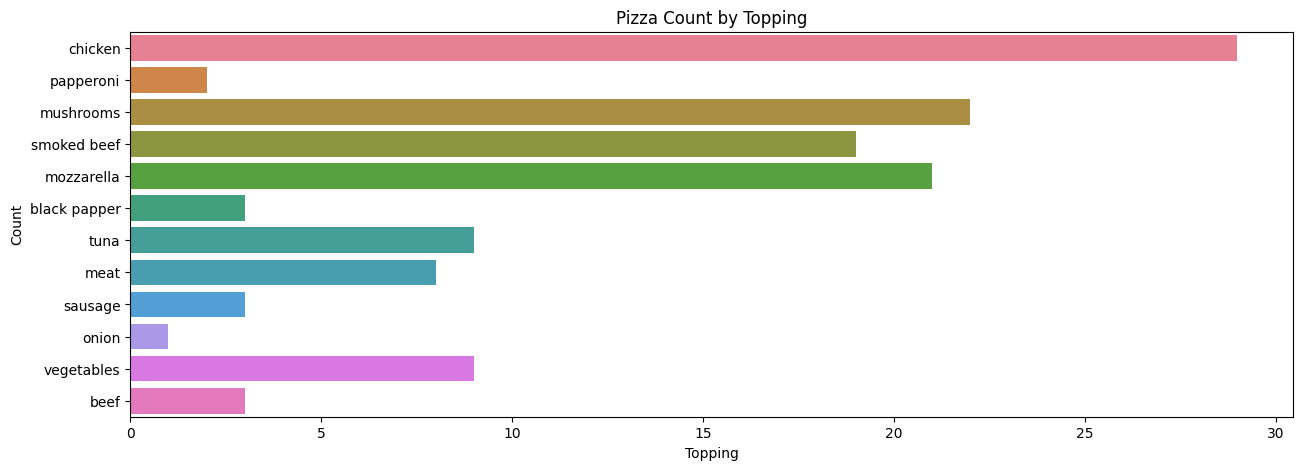

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(y=Pizza_df['topping'],hue='topping', data=Pizza_df)
plt.xlabel('Topping')
plt.ylabel('Count')
plt.title('Pizza Count by Topping')
plt.show()


###variant

In [24]:
Pizza_df['variant'].value_counts()

,count
variant,
classic,30
meat_lovers,10
double_mix,10
crunchy,10
new_york,10
double_decker,9
double_signature,5
american_favorite,5
super_supreme,5


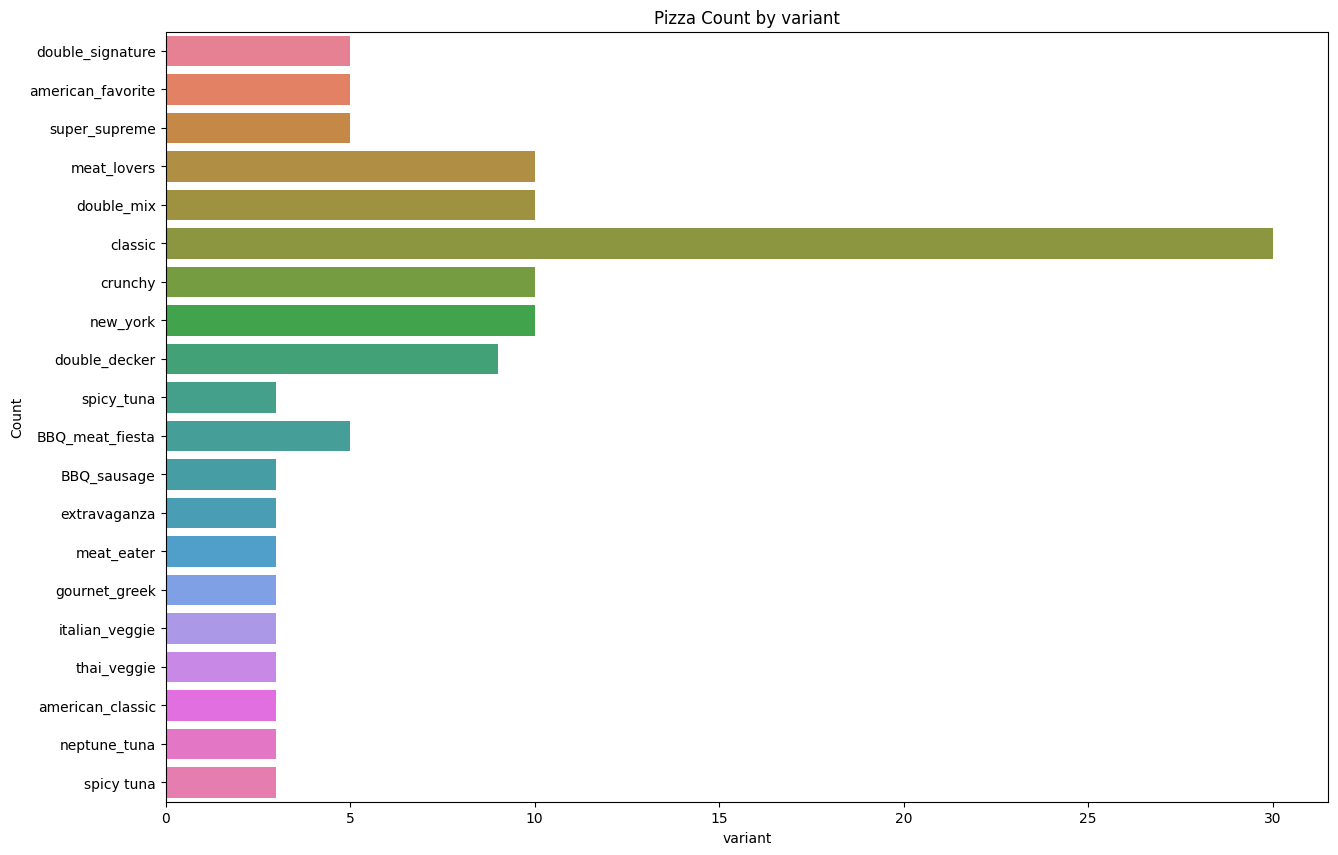

In [25]:
plt.figure(figsize=(15,10))
sns.countplot(y=Pizza_df['variant'],hue='variant', data=Pizza_df)
plt.xlabel('variant')
plt.ylabel('Count')
plt.title('Pizza Count by variant')
plt.show()


size

In [26]:
Pizza_df['variant'].value_counts()

,count
variant,
classic,30
meat_lovers,10
double_mix,10
crunchy,10
new_york,10
double_decker,9
double_signature,5
american_favorite,5
super_supreme,5


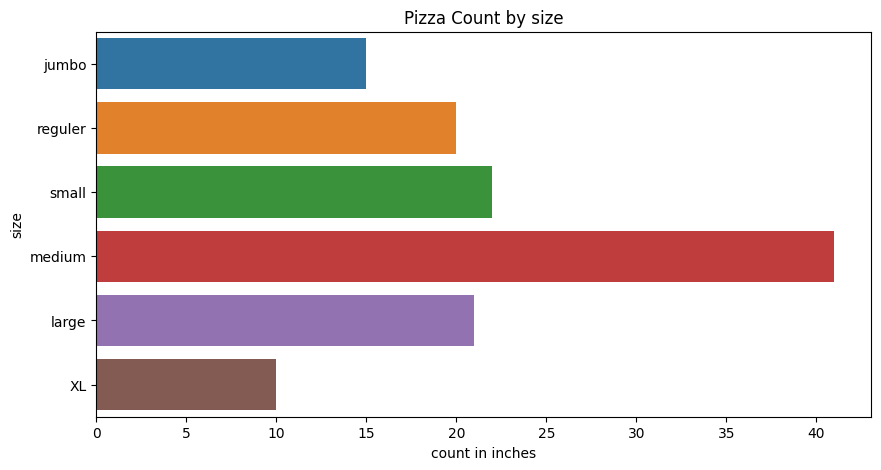

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(y=Pizza_df['size'],hue='size',data=Pizza_df)
plt.xlabel('count in inches')
plt.ylabel('size')
plt.title('Pizza Count by size')
plt.show()


extra_sauce

In [28]:
Pizza_df['extra_sauce'].value_counts()

,count
extra_sauce,
yes,76
no,53


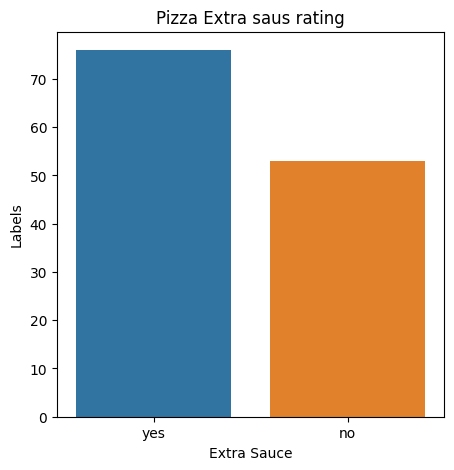

In [29]:
plt.figure(figsize=(5,5))
sns.countplot(x=Pizza_df['extra_sauce'],hue='extra_sauce',data=Pizza_df)
plt.xlabel('Extra Sauce')
plt.ylabel('Labels')
plt.title('Pizza Extra saus rating')
plt.show()

extra_cheese

In [30]:
Pizza_df['extra_cheese'].value_counts()

,count
extra_cheese,
yes,86
no,43


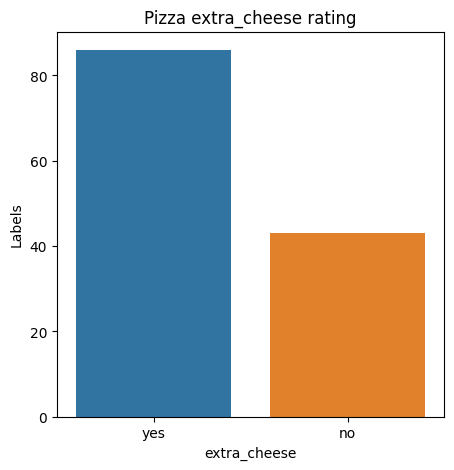

In [31]:
plt.figure(figsize=(5,5))
sns.countplot(x=Pizza_df['extra_cheese'],hue='extra_cheese',data=Pizza_df)
plt.xlabel('extra_cheese')
plt.ylabel('Labels')
plt.title('Pizza extra_cheese rating')
plt.show()

##Bivariate Analysis

Price By Company

In [32]:
Pizza_df.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese'],
      dtype='object')

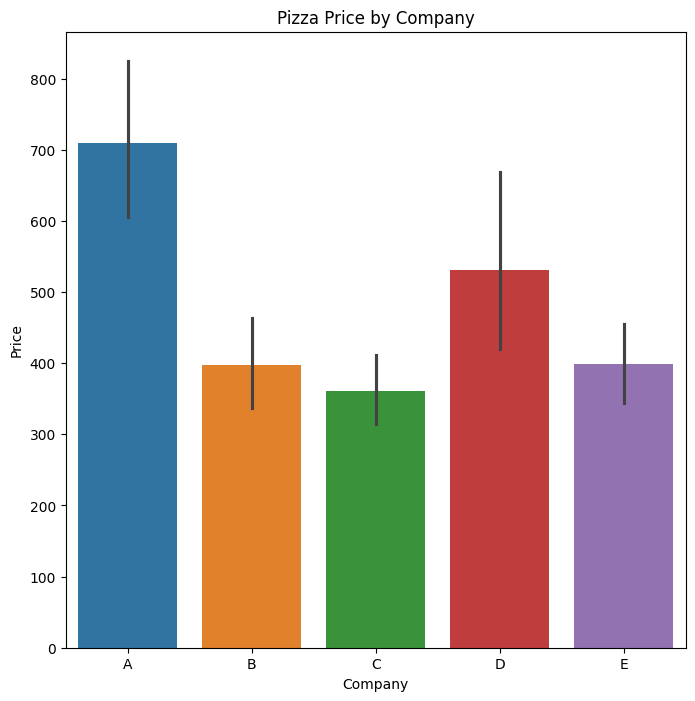

In [33]:
plt.figure(figsize=(8,8))
sns.barplot(x='company',y='price',hue='company',data=Pizza_df)
plt.xlabel('Company')
plt.ylabel('Price')
plt.title('Pizza Price by Company')
plt.show()

Price By Topping

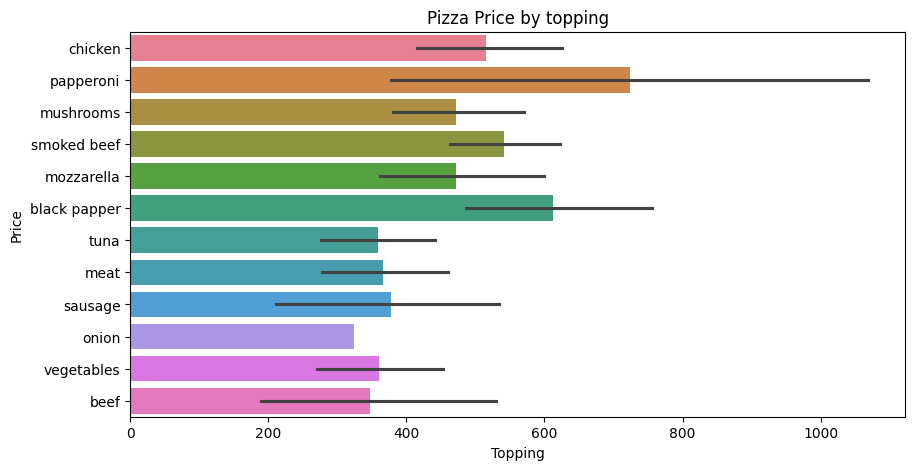

In [34]:
plt.figure(figsize=(10,5))
sns.barplot(y='topping',x='price',hue='topping',data=Pizza_df)
plt.xlabel('Topping')
plt.ylabel('Price')
plt.title('Pizza Price by topping')
plt.show()

Price By Size

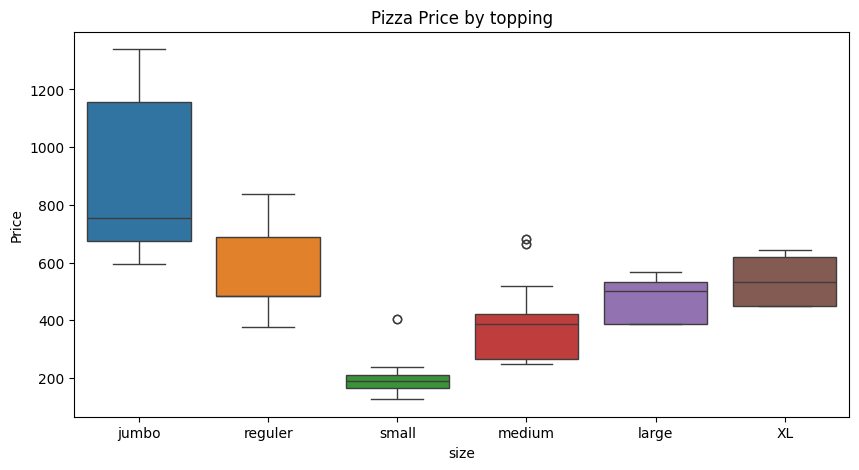

In [35]:
plt.figure(figsize=(10,5))
sns.boxplot(x='size',y='price',hue='size',data=Pizza_df)
plt.xlabel('size')
plt.ylabel('Price')
plt.title('Pizza Price by topping')
plt.show()

Most Expensive Pizza

In [36]:
Pizza_df[Pizza_df['price'].max()==Pizza_df['price']]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese
4,A,1339.2,18.0,mozzarella,double_signature,jumbo,yes,no


Diameter of jumbo size pizzas

In [37]:
Pizza_df[Pizza_df['size']=='jumbo']

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,1269.0,22.0,chicken,double_signature,jumbo,yes,yes
1,A,1069.2,20.0,papperoni,double_signature,jumbo,yes,yes
4,A,1339.2,18.0,mozzarella,double_signature,jumbo,yes,no
5,A,756.0,18.5,black papper,american_favorite,jumbo,no,no
6,A,594.0,16.0,smoked beef,american_favorite,jumbo,no,yes
10,A,756.0,18.5,mozzarella,super_supreme,jumbo,no,no
11,A,594.0,16.0,black papper,super_supreme,jumbo,yes,yes
15,A,756.0,18.5,mozzarella,meat_lovers,jumbo,no,yes
16,A,594.0,16.0,smoked beef,meat_lovers,jumbo,no,yes
20,A,1242.0,22.0,chicken,double_mix,jumbo,yes,yes


diameter of jumbo size

In [38]:
Pizza_df[Pizza_df['size']=='jumbo']['diameter'].head()

,diameter
0,22.0
1,20.0
4,18.0
5,18.5
6,16.0


Detect Outliers

In [39]:
Pizza_df[ (Pizza_df['size']=='jumbo') & (Pizza_df['diameter'].astype(float)<=16)]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese
6,A,594.0,16.0,smoked beef,american_favorite,jumbo,no,yes
11,A,594.0,16.0,black papper,super_supreme,jumbo,yes,yes
16,A,594.0,16.0,smoked beef,meat_lovers,jumbo,no,yes
80,D,594.0,16.0,smoked beef,meat_lovers,jumbo,no,yes


In [40]:
Pizza_df=Pizza_df.drop(Pizza_df.index[[6,11,16,80]])

In [41]:
Pizza_df[ (Pizza_df['size']=='jumbo') & (Pizza_df['diameter'].astype(float)<=16)]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese


Label Encoding

In [42]:
cat_cols=Pizza_df.select_dtypes(include=["object"]).columns

In [43]:
cat_cols

Index(['company', 'diameter', 'topping', 'variant', 'size', 'extra_sauce',
       'extra_cheese'],
      dtype='object')

In [44]:
label_encode = LabelEncoder()
for i in cat_cols:
  Pizza_df[i]=label_encode.fit_transform(Pizza_df[i])


In [45]:
Pizza_df.head(5)

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese
0,0,1269.0,8,2,8,1,1,1
1,0,1069.2,7,7,8,1,1,1
2,0,648.0,2,5,8,4,1,1
3,0,837.0,1,9,8,4,1,0
4,0,1339.2,5,4,8,1,1,0


Seaparate Features and Target Varaibel  X and y

In [46]:
x = Pizza_df.drop(['price'],axis=1)
y = Pizza_df['price']

In [47]:
x.columns

Index(['company', 'diameter', 'topping', 'variant', 'size', 'extra_sauce',
       'extra_cheese'],
      dtype='object')

In [48]:
y.head()

,price
0,1269.0
1,1069.2
2,648.0
3,837.0
4,1339.2


Split into Train set and Test set

In [49]:
x_train,x_test,y_train,y_test =train_test_split( x, y, test_size=0.2, random_state=42)

Import Regression Models

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import   XGBRegressor

Instance Creation

In [51]:
lr_reg = LinearRegression()
svr_reg = SVR()
rf_reg= RandomForestRegressor()
xgb_reg = XGBRegressor()

Taining Models

In [52]:
lr_reg.fit(x_train,y_train)

LinearRegression()

In [53]:
svr_reg.fit(x_train,y_train)

SVR()

In [54]:
rf_reg.fit(x_train,y_train)

RandomForestRegressor()

In [55]:
xgb_reg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [56]:
y_pred1_lr_reg = lr_reg.predict(x_test)
y_pred2_svr_reg = svr_reg.predict(x_test)
y_pred3_rf_reg = rf_reg.predict(x_test)
y_pred4_xgb_reg = xgb_reg.predict(x_test)


Evaluation Performance

In [57]:
from sklearn import metrics

score_lr_reg = metrics.r2_score(y_test,y_pred1_lr_reg)
score_svr_reg = metrics.r2_score(y_test,y_pred2_svr_reg)
score_rf_reg = metrics.r2_score(y_test,y_pred3_rf_reg)
score_xgb_reg = metrics.r2_score(y_test,y_pred4_xgb_reg)

In [58]:
print("Model Score")
print(f"Linear Model : {score_lr_reg} \nsvm Model {score_svr_reg} \nRandom Forest Model {score_rf_reg} \nXGBoost Model: {score_xgb_reg}")

Model Score
Linear Model : 0.45435664770306106 
svm Model -0.08311439844261836 
Random Forest Model 0.844851139894088 
XGBoost Model: 0.732642299892988


In [59]:
result = pd.DataFrame(
    {
        'Models':["LR","SVR","RF","XGB"],
        "score":[score_lr_reg,score_svr_reg,score_rf_reg,score_xgb_reg]
    }
)
result

,Models,score
0,LR,0.454357
1,SVR,-0.083114
2,RF,0.844851
3,XGB,0.732642


/tmp/ipython-input-1047063147.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


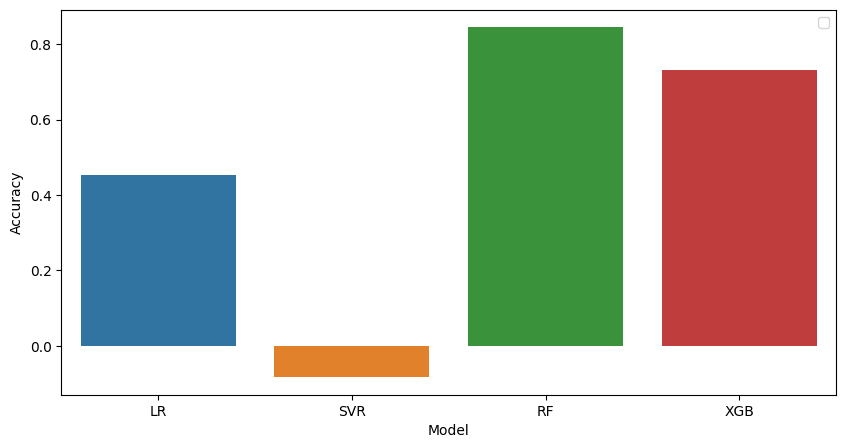

In [60]:
plt.figure(figsize=(10,5))
sns.barplot(x='Models',y='score',hue='Models',data=result)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

##Feature Impotance

Linear Regression

In [63]:
rf_reg.feature_importances_

array([0.03698458, 0.2415581 , 0.04026468, 0.24688683, 0.38091838,
       0.03550073, 0.0178867 ])

In [69]:
rf_fea = pd.Series(rf_reg.feature_importances_,index=x.columns)


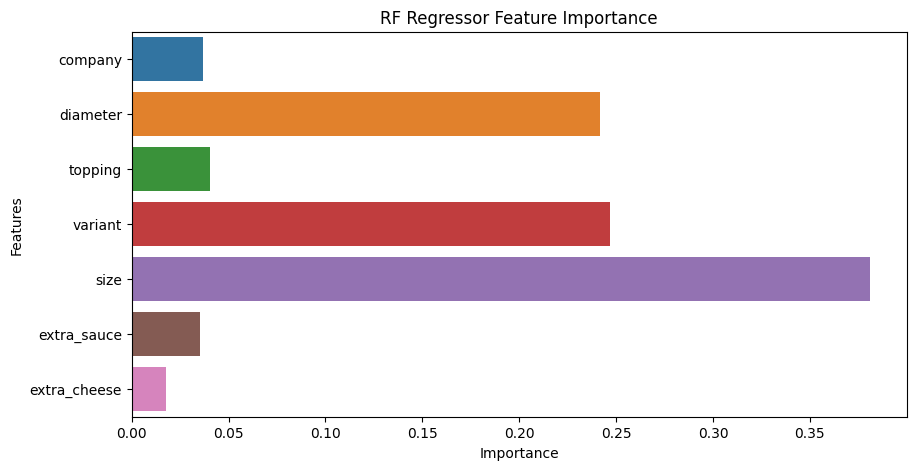

In [79]:
plt.figure(figsize=(10,5))
sns.barplot(x=rf_fea.values,y=rf_fea.index,hue=rf_fea.index)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("RF Regressor Feature Importance")
plt.show()

XGBoost Regressor

In [74]:
xgb_reg.feature_importances_

array([0.0030679 , 0.13999932, 0.00745435, 0.05985209, 0.7505242 ,
       0.0278424 , 0.01125965], dtype=float32)

In [77]:
xgb_fea = pd.Series(xgb_reg.feature_importances_,index=x.columns)

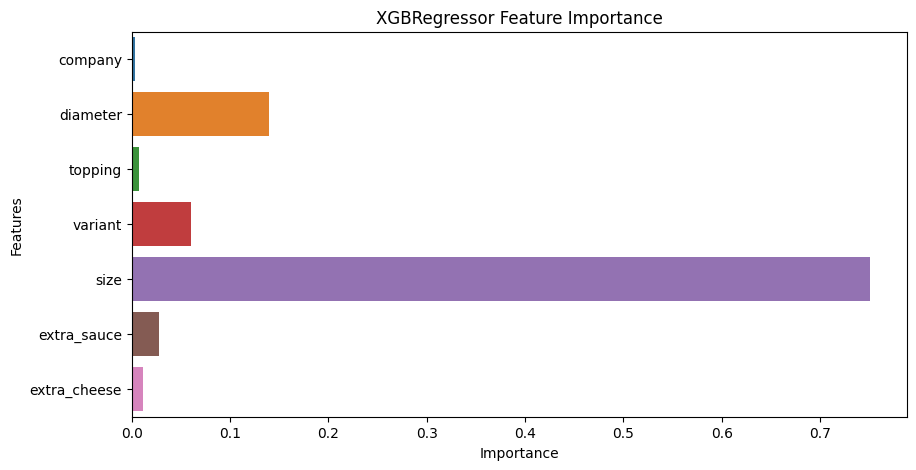

In [80]:
plt.figure(figsize=(10,5))
sns.barplot(x=xgb_fea.values,y=xgb_fea.index,hue=xgb_fea.index)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("XGBRegressor Feature Importance")
plt.show()

Train XGBoost Regreesor and save model

In [82]:
xgb_reg = XGBRegressor()
xgb_reg.fit(x,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [86]:
import pickle

# Save the model with the new name
with open('Pizza Price Prediction.pkl', 'wb') as f:
    pickle.dump(xgb_reg, f)

# Download it
from google.colab import files
files.download('Pizza Price Prediction.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>